In [189]:
import tensorflow as tf
sess = tf.InteractiveSession()

import numpy as np
import matplotlib
#from matplotlib import gridspec
import matplotlib.pyplot as plt
%matplotlib notebook

import math

/Users/gbg141/dopamine/dopamine-env/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [207]:
def plot_c_value_distribution(c_value, support, dist_values, use_exp_bins=False): 
    num_atoms = support.shape[0]
    print(num_atoms)
    fig, ax = plt.subplots(figsize=(5, 3))
    if use_exp_bins:
        ax.set_xscale('log')
        base = (support[-1]/support[0])**(1./num_atoms)
        extra_mark = support[0]*(base)**(num_atoms+1)
    else:
        extra_mark = support[-1] + (support[-1]-support[0])/num_atoms
    width = np.diff(np.hstack((support, np.array((extra_mark)))))
    print(width)
    ax.set_title('c: ' + str(c_value))
    ax.set_xlabel('c value')
    ax.set_ylabel('probability')
    ax.bar(support, dist_values, width=width, alpha=0.5, align='edge',linewidth=1, edgecolor='black')
    fig.canvas.draw()
    # Now we can save it to a numpy array.
    #dist = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    #dist = dist.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    #plt.close('all')
    #return dist

In [208]:
cmin = float(0.05)
cmax = float(5)
num_atoms = 101

use_exp_bins = True

if exp_bins:
    log_ratio_support = tf.linspace(tf.log(cmin), tf.log(cmax), num_atoms)
    ratio_support = tf.exp(log_ratio_support)
    #base = (tf.reduce_max(ratio_support)/tf.reduce_min(ratio_support))**(1./num_atoms)
    #last_mark = tf.reduce_min(ratio_support)*(base)**(num_atoms+1)
else:
    ratio_support = tf.linspace(cmin, cmax, num_atoms)
    log_ratio_support = tf.log(ratio_support)
    #last_mark = tf.reduce_max(ratio_support) + (tf.reduce_max(ratio_support)-tf.reduce_min(ratio_support))/num_atoms

101


<IPython.core.display.Javascript object>


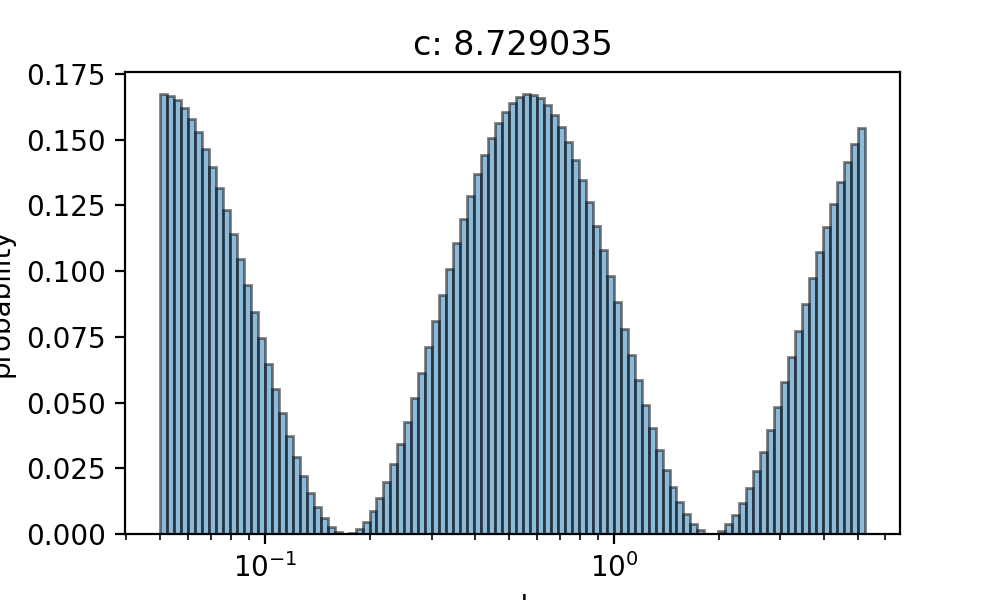

[0.00235643 0.00246748 0.00258376 0.00270554 0.00283305 0.00296657
 0.00310638 0.00325277 0.00340608 0.00356659 0.00373469 0.00391071
 0.004095   0.004288   0.00449008 0.00470169 0.00492325 0.00515531
 0.00539827 0.00565267 0.00591908 0.00619803 0.00649014 0.006796
 0.0071163  0.00745168 0.00780287 0.00817059 0.00855568 0.00895889
 0.00938109 0.00982323 0.01028618 0.01077093 0.0112786  0.01181012
 0.01236668 0.01294953 0.01355985 0.01419887 0.01486805 0.01556876
 0.01630253 0.01707077 0.01787534 0.0187178  0.01959991 0.02052355
 0.02149087 0.02250373 0.02356428 0.02467483 0.02583778 0.02705544
 0.02833033 0.02966571 0.0310638  0.03252774 0.03406078 0.03566605
 0.03734666 0.03910702 0.04095006 0.04287994 0.04490083 0.04701692
 0.04923284 0.05155277 0.05398273 0.05652678 0.05919087 0.06198037
 0.06490147 0.06795979 0.07116306 0.07451677 0.0780288  0.08170605
 0.08555686 0.08958888 0.0938108  0.09823227 0.10286188 0.10770965
 0.11278582 0.11810112 0.12366724 0.12949467 0.13559914 0.141988

In [209]:
support = ratio_support
dist_values = tf.math.l2_normalize(tf.constant([math.cos(x)**2 for x in np.linspace(0,6,num_atoms)]))
c_value = tf.reduce_sum(ratio_support*dist_values, axis=0)

plot_c_value_distribution(c_value.eval(), support.eval(), dist_values.eval(), exp_bins)